In [1]:
# Dimension reduction using Fisher Linear Discriminant (FLD)
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Creating the data
Xd = np.array([[0,1,1,1],[1,1,1,1],[1,1,-0,1],[0,1,0,1],
             [0,3,1,2],[0,3,0,2],[2,2,0,2],[2,0,0,2]])
# Seperating the datapoints from their labels
X = Xd[:,:3]
y = Xd[:,3]

In [3]:
# Computing the d-dimensional mean vectors
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [0.5 1.  0.5]

Mean Vector class 2: [1.   2.   0.25]



In [4]:
# Computing the Scatter Matrices
# The within-class scatter matrix S_W
S_W = np.zeros((3,3))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((3,3))                  # scatter matrix for every class
    for row in X[y==cl]:
        row, mv = row.reshape(3,1), mv.reshape(3,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)
# Alternatively, we could also go through computing the class-covariance matrices S_W

within-class Scatter Matrix:
 [[ 5.   -4.   -1.  ]
 [-4.    6.    1.  ]
 [-1.    1.    1.75]]


In [5]:
# Between-class scatter matrix S_B
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((3,3))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(3,1) # make column vector
    overall_mean = overall_mean.reshape(3,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 0.5    1.    -0.25 ]
 [ 1.     2.    -0.5  ]
 [-0.25  -0.5    0.125]]


In [6]:
# Solving the generalized eigenvalue problem for the matrix inv(S_W)S_B
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(3,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.664 ]
 [ 0.7126]
 [-0.2267]]
Eigenvalue 1: 1.58e+00

Eigenvector 2: 
[[0.1224]
 [0.1827]
 [0.9755]]
Eigenvalue 2: -8.68e-19

Eigenvector 3: 
[[-0.8902]
 [ 0.4542]
 [ 0.0363]]
Eigenvalue 3: -1.10e-16


In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

1.5813953488372083
1.0997943999487304e-16
8.68321831174687e-19


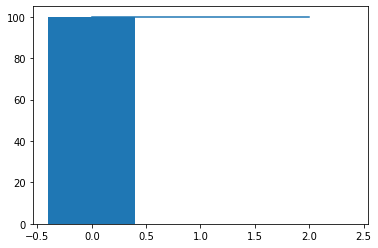

In [8]:
# Calculating the explained variance from the calculated eigenvalues to show how much information (variance)
# can be attributed to each of the principal components
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
x =  np.arange(3)

fig, ax = plt.subplots()
plt.bar(x, var_exp)
plt.plot(x, cum_var_exp)
plt.show()

In [9]:
# Expressing the “explained variance” as percentage
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%


In [10]:
# Selecting linear discriminants for the new feature subspace
# Choosing 2 eigenvectors with the largest eigenvalues to project the data on 2D
matrix_w2d = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w2d.real)

Matrix W:
 [[ 0.664  -0.8902]
 [ 0.7126  0.4542]
 [-0.2267  0.0363]]


In [11]:
# Choosing 2 eigenvectors with the largest eigenvalues to project the data on 1D
matrix_w1d = eig_pairs[0][1].reshape(3,1)
print('Matrix W:\n', matrix_w1d.real)

Matrix W:
 [[ 0.664 ]
 [ 0.7126]
 [-0.2267]]


In [12]:
# Projection on 2D feature space
X2d = ((matrix_w2d).T.dot(X.T)).T
# Projection on 1D feature space
X1d = ((matrix_w1d).T.dot(X.T)).T

In [13]:
print (X2d)
print (X1d)

[[ 0.4858  0.4905]
 [ 1.1498 -0.3997]
 [ 1.3765 -0.436 ]
 [ 0.7126  0.4542]
 [ 1.9109  1.3988]
 [ 2.1377  1.3625]
 [ 2.7531 -0.872 ]
 [ 1.3279 -1.7804]]
[[0.4858]
 [1.1498]
 [1.3765]
 [0.7126]
 [1.9109]
 [2.1377]
 [2.7531]
 [1.3279]]


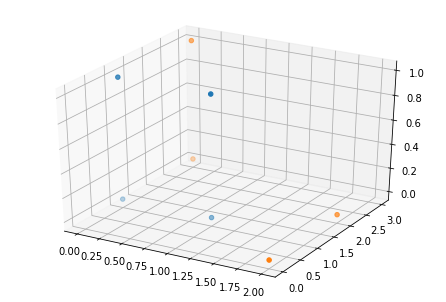

In [14]:
# Visualizing the initial data in 3D space
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter (X[y==1,0],X[y==1,1],X[y==1,2])
ax.scatter (X[y==2,0],X[y==2,1],X[y==2,2])
plt.show()

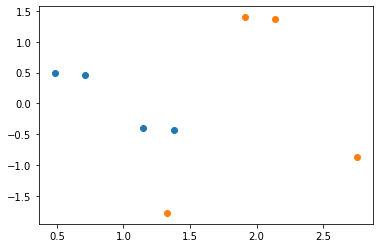

In [15]:
# Visualizing the projected data on 2D space
fig = plt.figure()
plt.scatter (X2d[y==1,0],X2d[y==1,1])
plt.scatter (X2d[y==2,0],X2d[y==2,1])
plt.show()

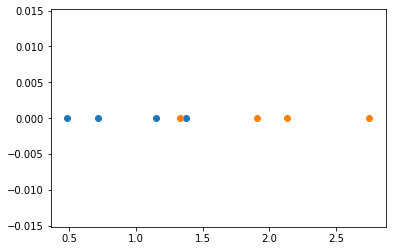

In [16]:
# Visualizing the projected data on 1D space
y1 = np.zeros(10)
fig = plt.figure()
plt.scatter (X1d[y==1,0],y1[0:4])
plt.scatter (X1d[y==2,0],y1[0:4])
plt.show()